In [0]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline
plt.style.use('ggplot')
sns.set()

In [63]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [64]:
%pwd

'/content/drive/My Drive/Saya'

In [4]:
%cd drive/My Drive/Saya

/content/drive/My Drive/Saya


In [0]:
df = pd.read_csv('datafile.csv', index_col='Date',parse_dates=True)

In [6]:
df.head()

,SupplyWaterTemperature,SupplyWaterPressure,BackWaterTemperature,BackWaterPressure,ValveState,TotalFlow,Flow,FlowRate,SendInterval
Date,,,,,,,,,
2018-06-27 08:29:00,64.886,80.0354,0.0,0.0,1,95966.0,0.0,0.0,60
2018-06-27 08:30:00,64.778,80.0311,0.0,0.0,1,95966.0,0.0,0.0,60
2018-06-27 08:31:00,64.760,80.0311,0.0,0.0,1,95966.0,0.0,0.0,60
2018-06-27 08:32:00,64.796,80.0340,0.0,0.0,1,95966.0,0.0,0.0,60
2018-06-27 08:33:00,64.868,80.0383,0.0,0.0,1,95966.0,0.0,0.0,60


In [0]:
#rows and columns
df.shape

(203913, 9)

In [0]:
#check for null
df.isnull().sum()


SupplyWaterTemperature    0
SupplyWaterPressure       0
BackWaterTemperature      0
BackWaterPressure         0
ValveState                0
TotalFlow                 0
Flow                      0
FlowRate                  0
SendInterval              0
dtype: int64

In [0]:
df = df.drop(columns='TotalFlow');

We are mainly interested in analysing Flow per day and week.
Total Flow is only going to increase over time

In [0]:
df.describe()

,SupplyWaterTemperature,SupplyWaterPressure,BackWaterTemperature,BackWaterPressure,ValveState,Flow,FlowRate,SendInterval
count,203913.000000,203913.000000,203913.000000,203913.000000,203913.00000,203913.000000,203913.000000,203913.0
mean,76.665289,66.147464,0.006134,0.009278,0.99950,0.105490,0.001521,60.0
std,10.647937,26.482725,0.604410,0.914203,0.02236,3.104485,0.008394,0.0
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,60.0
25%,69.602000,70.073100,0.000000,0.000000,1.00000,0.000000,0.000000,60.0
50%,76.424000,80.003500,0.000000,0.000000,1.00000,0.000000,0.000000,60.0
75%,83.318000,80.016600,0.000000,0.000000,1.00000,0.000000,0.000000,60.0
max,119.012000,100.017000,60.206000,90.096400,1.00000,1184.000000,1.866820,60.0


In [0]:
df = df.drop(columns = ['SendInterval','ValveState','TotalFlow'])

# Auto Corelation
The idea behind it is that if a signal contain a pattern which repeats itself after a time-period of t seconds, there will be a high correlation between the signal and a t sec delayed version of the signal.

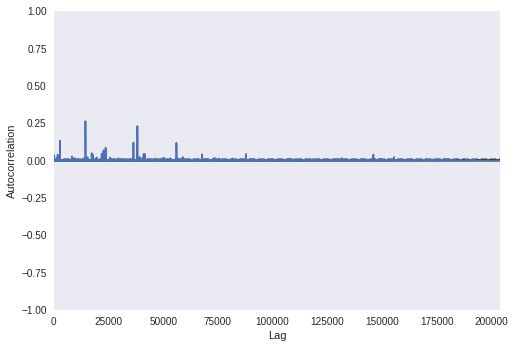

In [67]:
pd.plotting.autocorrelation_plot(df['Flow'])
plt.show();

# Corelation

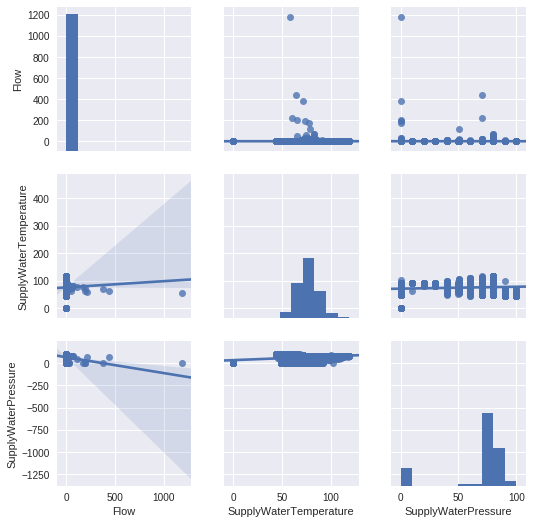

In [57]:
sns.pairplot(df,x_vars=["Flow", "SupplyWaterTemperature","SupplyWaterPressure"],
             y_vars=["Flow", "SupplyWaterTemperature","SupplyWaterPressure"],kind='reg')

# Trend Analysis

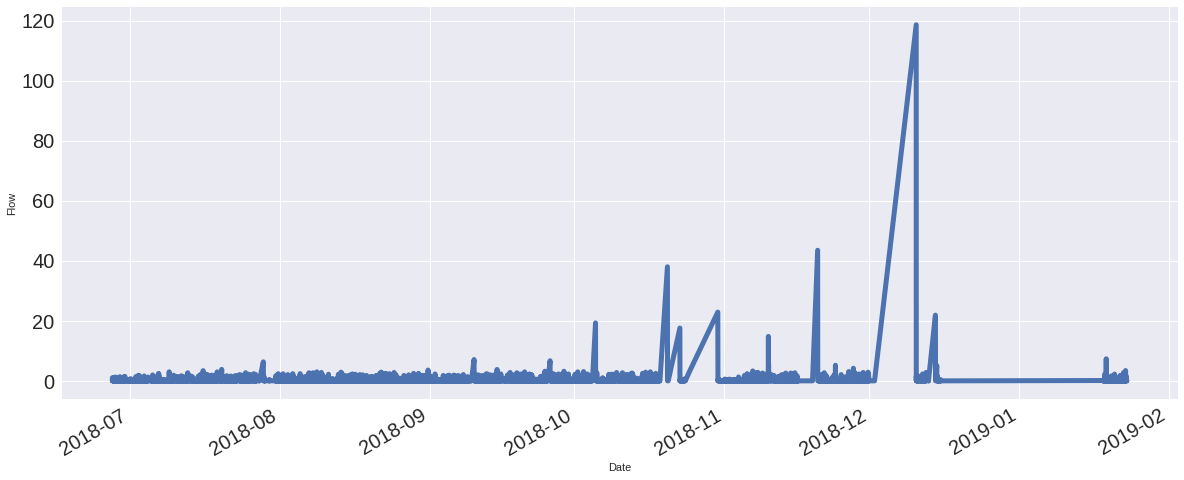

In [55]:
df['Flow'].rolling(10).mean().plot(figsize=(20,8),linewidth=5,fontsize=20)
plt.ylabel('Flow');plt.show();

# Seasonal Variations

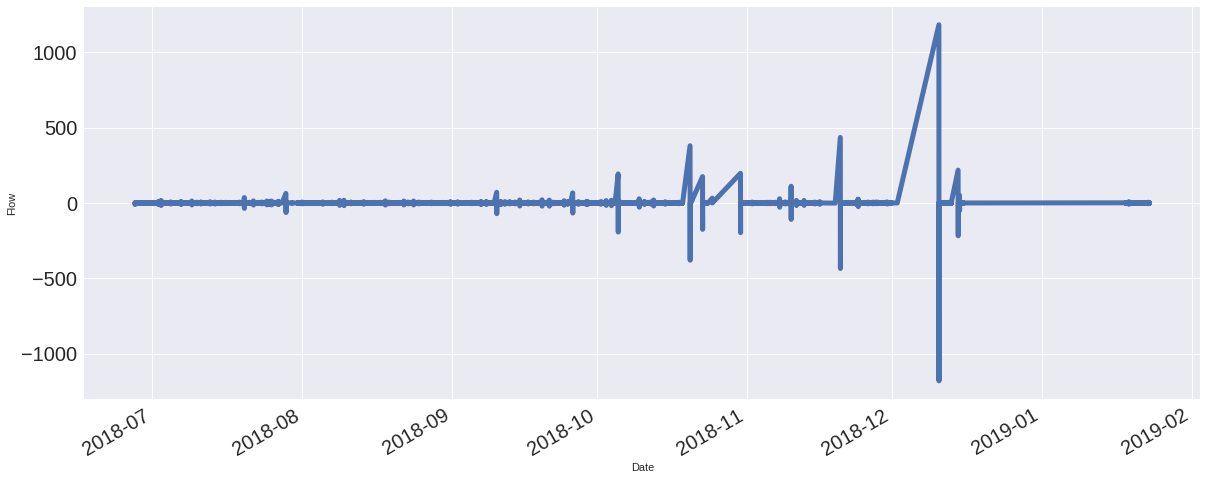

In [54]:
df['Flow'].diff(periods=30).plot(figsize=(20,8),linewidth=5,fontsize=20)
plt.ylabel('Flow');plt.show();

# Periodic Variations

Text(0, 0.5, 'Flow')

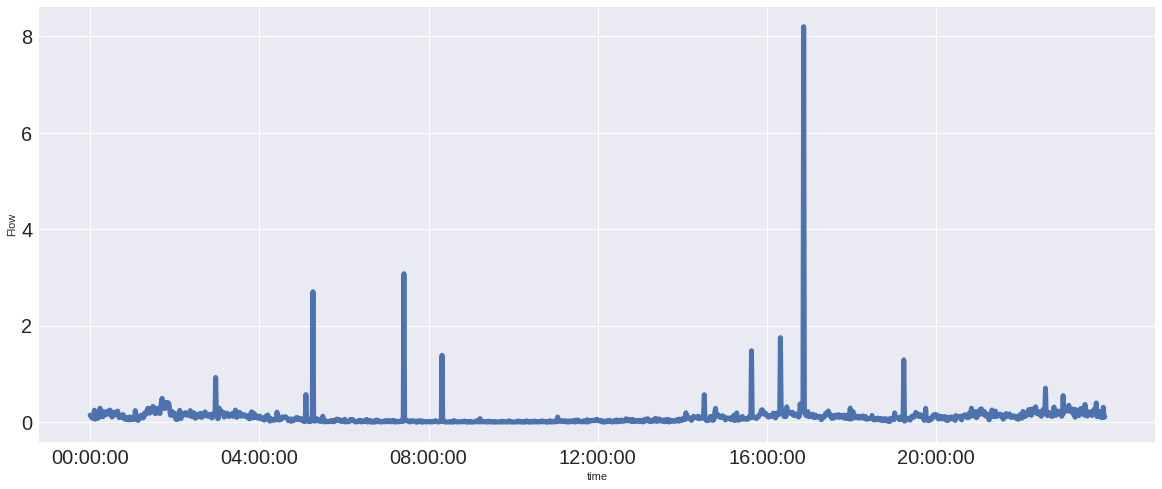

In [53]:
bytime = df['Flow'].groupby(df['Flow'].index.time).mean()
ticks = 4*60*60*np.arange(6)
bytime.plot(xticks=ticks,figsize=(20,8),linewidth=5,fontsize=20)
plt.ylabel("Flow")

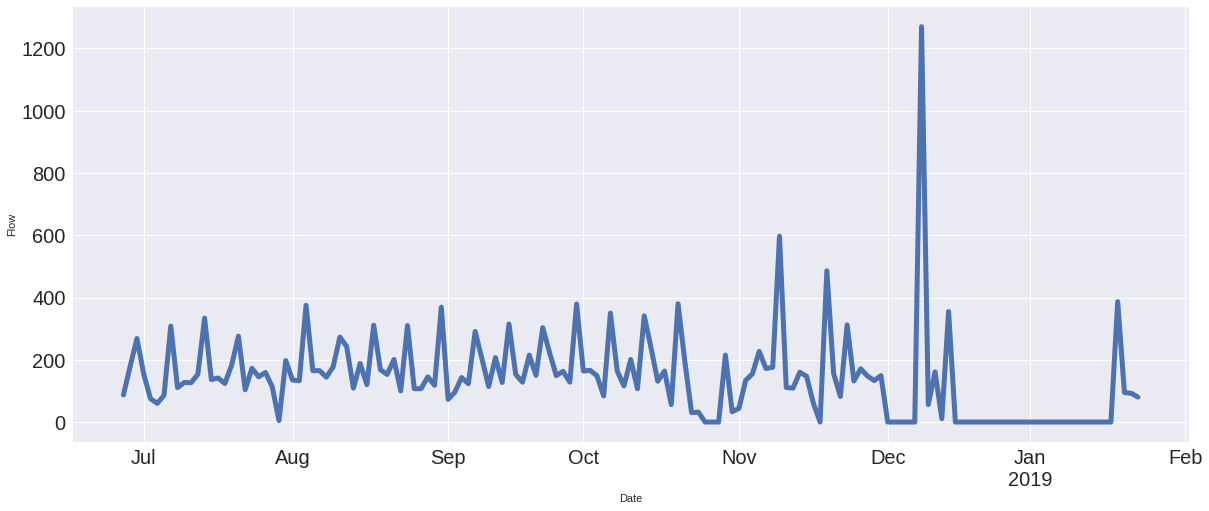

In [58]:
businessday = df['Flow'].resample('B').sum().plot(figsize=(20,8),linewidth=5,fontsize=20)
businessday.plot(style = [':','--','-'])
plt.ylabel('Flow');

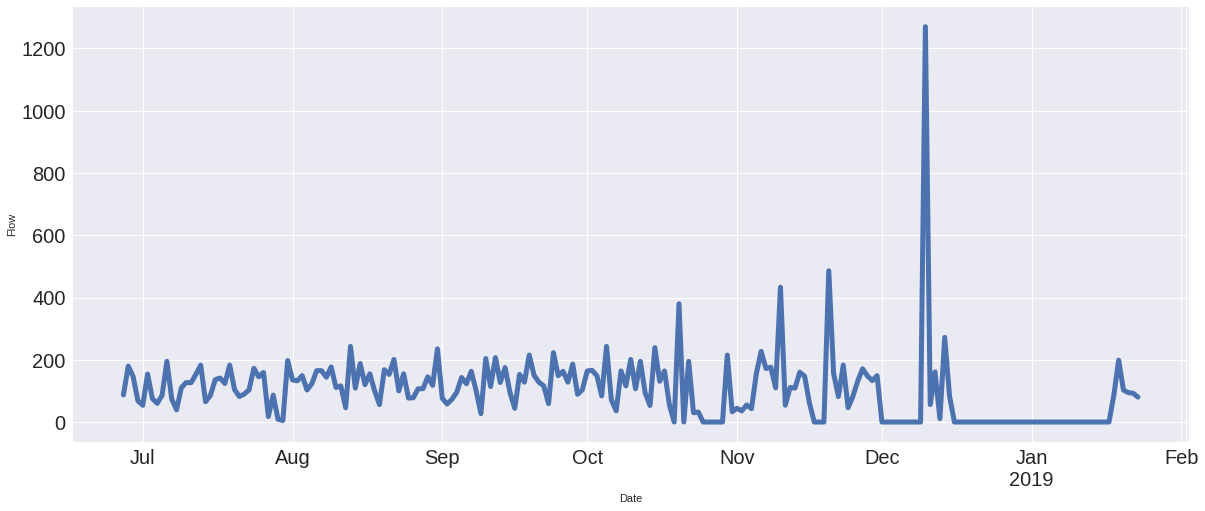

In [59]:
calenderday = df['Flow'].resample('D').sum().plot(figsize=(20,8),linewidth=5,fontsize=20)
calenderday.plot(style = [':','--','-'])
plt.ylabel('Flow');

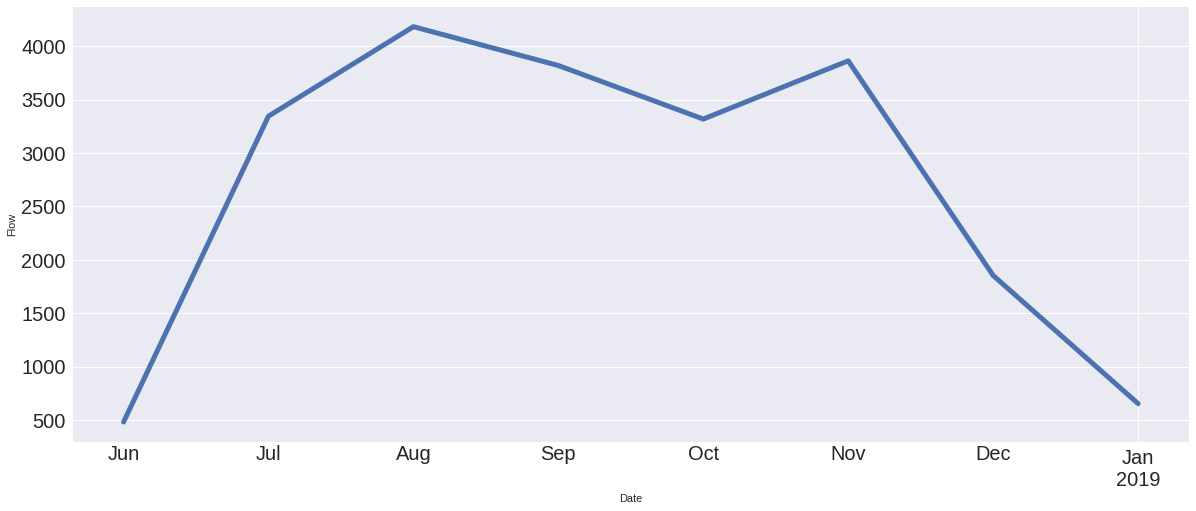

In [60]:
monthend = df['Flow'].resample('M').sum().plot(figsize=(20,8),linewidth=5,fontsize=20)
monthend.plot(style = [':','--','-'])
plt.ylabel('Flow');

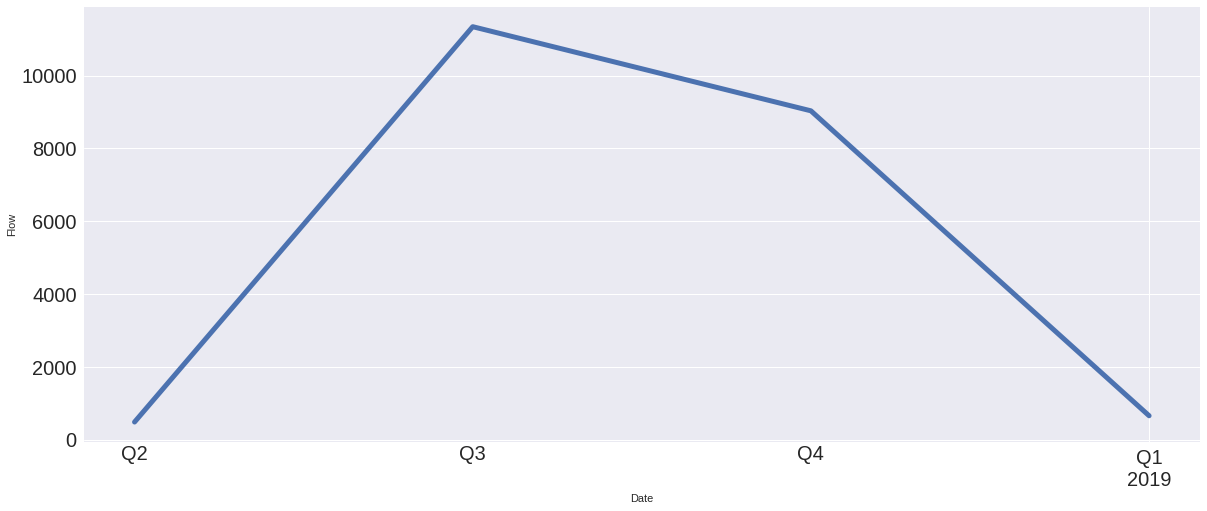

In [61]:
quarterend = df['Flow'].resample('Q').sum().plot(figsize=(20,8),linewidth=5,fontsize=20)
quarterend.plot(style = [':','--','-'])
plt.ylabel('Flow');